REFERENCE
- Textbook: “Numerical Methods for Engineers, 8th edition” Steven C. Chapra and Raymond P. Canale, ISBN:1260232077, Copyright year:2021, McGraw-Hill.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

from scipy import optimize

### Problem 13.2
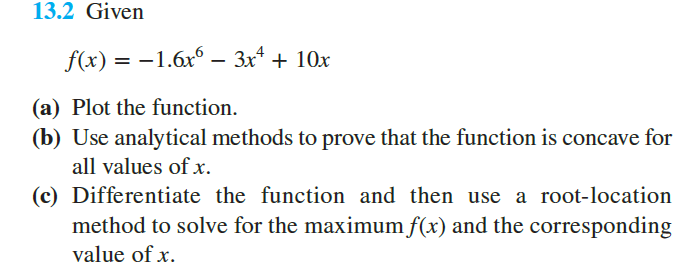

### Answer

1. Define Functions

In [2]:
# reference: this function is from my homework of last semester's course, which implements
# pesudocode in figure 5.11 of the textbook

def bisect(f, xl, xu, es, imax = float('inf')):
    """
    This function implements algorithm in figure 5.11, pesudocode for bisection
    sub-program which minimized function evaluations
    
    f: function of the equation
    xl: lower guess
    xu: upper guess (f(xl) and f(xu) have opposite signs)
    es: error criterion (in percent)
    imax: maximum iteration steps
    
    Returns: the approximate root 
    """
    
    i = 0
    fl = f(xl)
    ea = float('inf')
    xrold = xl   
    while True:
        i += 1
        xr = (xl + xu) / 2 # root location: bisection / middle
        fr = f(xr)
        
        test = fl * fr
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
            fl = fr
        else:
            ea = 0
            
        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100
        print('Step: {}, xr: {}, fr: {}, ea: {}'.format(i, xr, fr, ea))
        
        if ea < es or i >= imax:
            break
        xrold = xr
    
    print('\nThe approximate root is: {}'.format(xr))
    return xr

2. Problem Solving

(a)

In [3]:
def f1(x):    
    result = -1.6 * (x ** 6) - 3 * (x ** 4) + 10 * x 
    return result

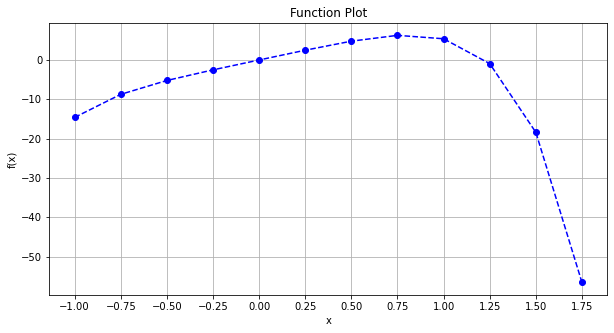

In [4]:
x = list(np.arange(-1, 2, 0.25))
y = [f1(i) for i in x]

plt.figure(figsize = (10, 5))
plt.plot(x, y, 'bo--')
plt.xticks(x)
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# insights: the maximum should be betwen 0.5 and 1, around 0.75

(b)

Answer:
$$
f(x)=-1.6x^6-3x^4+10x
$$
$$
f'(x)=-9.6x^5-12x^3+10
$$
$$
f''(x)=-48x^4-36x^2=-(48x^4+36x^2)\leq0
$$
Since the second derivative of the function is always equal to or smaller than 0, we could prove that the function is concave for all values.

(c)

In [5]:
# Differentiate the function
def f1_1st_derivative(x):    
    result = -9.6 * (x ** 5) - 12 * (x ** 3) + 10
    return result

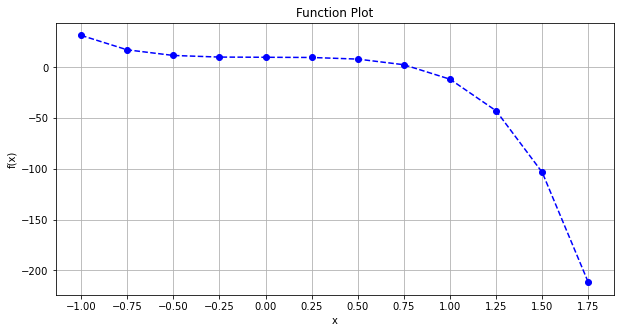

In [6]:
x = list(np.arange(-1, 2, 0.25))
y = [f1_1st_derivative(i) for i in x]

plt.figure(figsize = (10, 5))
plt.plot(x, y, 'bo--')
plt.xticks(x)
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# insights: the maximum should be betwen 0.5 and 1, around 0.75

In [7]:
# use bisection root location method
x1 = bisect(f1_1st_derivative, 0.5, 1.0, 1)
print('The maximum value of f(x) should be: {:.4f}'.format(f1(x1)))

Step: 1, xr: 0.75, fr: 2.6593750000000007, ea: 33.33333333333333
Step: 2, xr: 0.875, fr: -2.9629882812499986, ea: 14.285714285714285
Step: 3, xr: 0.8125, fr: 0.1641876220703118, ea: 7.6923076923076925
Step: 4, xr: 0.84375, fr: -1.3133851051330563, ea: 3.7037037037037033
Step: 5, xr: 0.828125, fr: -0.5540072888135903, ea: 1.8867924528301887
Step: 6, xr: 0.8203125, fr: -0.1898728753440082, ea: 0.9523809523809524

The approximate root is: 0.8203125
The maximum value of f(x) should be: 6.3572


3. Testing

In [8]:
optimize.fmin(lambda x: -f1(x), 0)
# the results are similar

Optimization terminated successfully.
         Current function value: -6.357561
         Iterations: 24
         Function evaluations: 48


array([0.816125])

### Problem 13.10

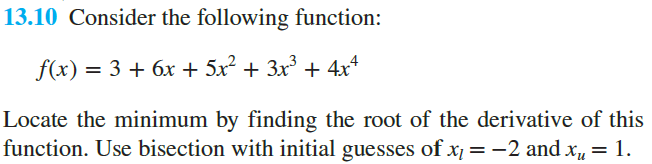

### Answer

1. Define Functions

In [9]:
# use the bisection function from the above question

2. Problem Solving

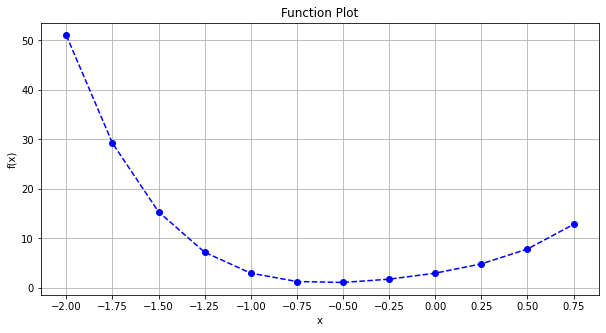

In [10]:
def f2(x):    
    result = 3 + 6 * x + 5 * (x ** 2) + 3 * (x ** 3) + 4 * (x ** 4)
    return result

x = list(np.arange(-2, 1, 0.25))
y = [f2(i) for i in x]

plt.figure(figsize = (10, 5))
plt.plot(x, y, 'bo--')
plt.xticks(x)
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# insights: the minimum should be betwen -0.75 and -0.25

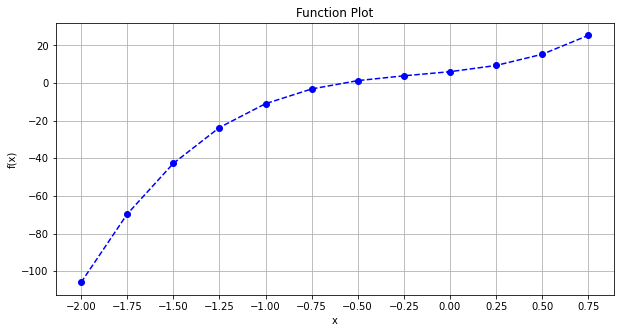

In [11]:
def f2_1st_derivative(x):    
    result = 6 + 10 * x + 9 * (x ** 2) + 16 * (x ** 3)
    return result

x = list(np.arange(-2, 1, 0.25))
y = [f2_1st_derivative(i) for i in x]

plt.figure(figsize = (10, 5))
plt.plot(x, y, 'bo--')
plt.xticks(x)
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# insights: the root should be betwen -0.75 and -0.25

In [12]:
# use bisection root location method
x2 = bisect(f2_1st_derivative, -2, 1, 1)
print('The minimum value of f(x) should be: {:.4f}'.format(f2(x2)))

Step: 1, xr: -0.5, fr: 1.25, ea: 300.0
Step: 2, xr: -1.25, fr: -23.6875, ea: 60.0
Step: 3, xr: -0.875, fr: -6.578125, ea: 42.857142857142854
Step: 4, xr: -0.6875, fr: -1.8203125, ea: 27.27272727272727
Step: 5, xr: -0.59375, fr: -0.11376953125, ea: 15.789473684210526
Step: 6, xr: -0.546875, fr: 0.60601806640625, ea: 8.571428571428571
Step: 7, xr: -0.5703125, fr: 0.25621795654296875, ea: 4.10958904109589
Step: 8, xr: -0.58203125, fr: 0.07382488250732422, ea: 2.013422818791946
Step: 9, xr: -0.587890625, fr: -0.019312500953674316, ea: 0.9966777408637874

The approximate root is: -0.587890625
The minimum value of f(x) should be: 1.0690


3. Testing

In [13]:
optimize.fmin(lambda x: f2(x), 0)
# the results are similar

Optimization terminated successfully.
         Current function value: 1.068969
         Iterations: 23
         Function evaluations: 46


array([-0.5866875])